In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('cybersecurity_attacks.csv')
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [10]:
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

Timestamp: 39997 unique values
Source IP Address: 40000 unique values
Destination IP Address: 40000 unique values
Source Port: 29761 unique values
Destination Port: 29895 unique values
Protocol: 3 unique values
Packet Length: 1437 unique values
Packet Type: 2 unique values
Traffic Type: 3 unique values
Payload Data: 40000 unique values
Malware Indicators: 1 unique values
Anomaly Scores: 9826 unique values
Alerts/Warnings: 1 unique values
Attack Type: 3 unique values
Attack Signature: 2 unique values
Action Taken: 3 unique values
Severity Level: 3 unique values
User Information: 32389 unique values
Device Information: 32104 unique values
Network Segment: 3 unique values
Geo-location Data: 8723 unique values
Proxy Information: 20148 unique values
Firewall Logs: 1 unique values
IDS/IPS Alerts: 1 unique values
Log Source: 2 unique values


In [12]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [13]:
df.describe(include=['object'])

,Timestamp,Source IP Address,Destination IP Address,Protocol,Packet Type,Traffic Type,Payload Data,Malware Indicators,Alerts/Warnings,Attack Type,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000,40000,40000,40000,20000,19933,40000,...,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,3,2,3,40000,1,1,3,...,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,ICMP,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,Alert Triggered,DDoS,...,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,13429,20237,13376,1,20000,19933,13428,...,13529,13435,6,35,13408,16,2,20039,19950,20116


Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


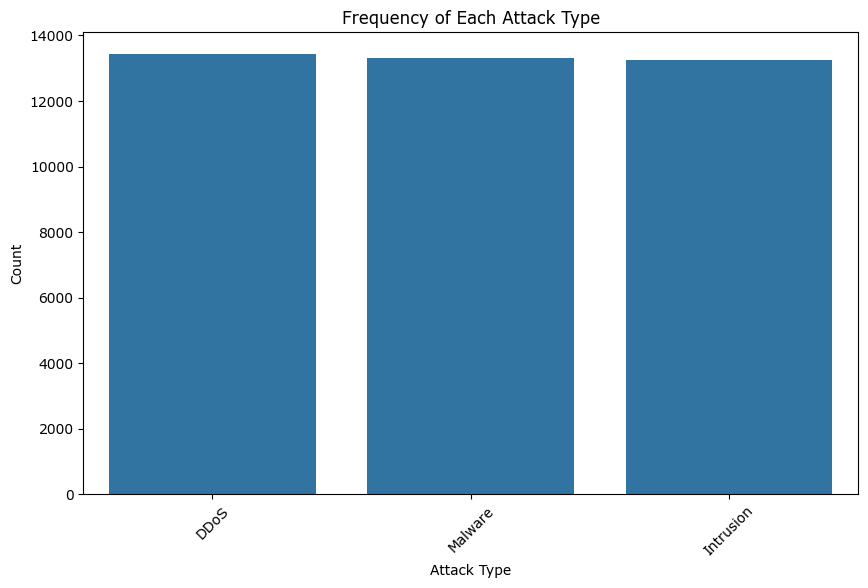

In [14]:

print(df['Attack Type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index)
plt.title("Frequency of Each Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


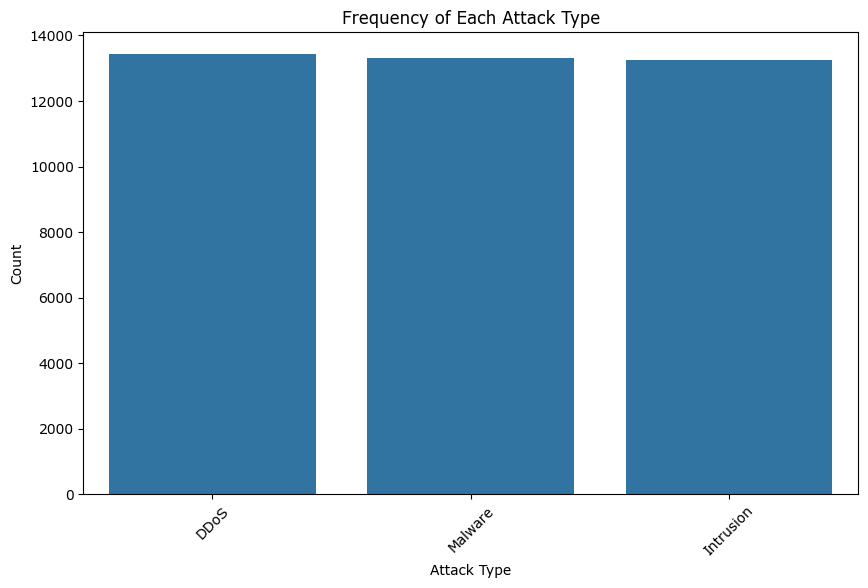

In [15]:

print(df['Attack Type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index)
plt.title("Frequency of Each Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


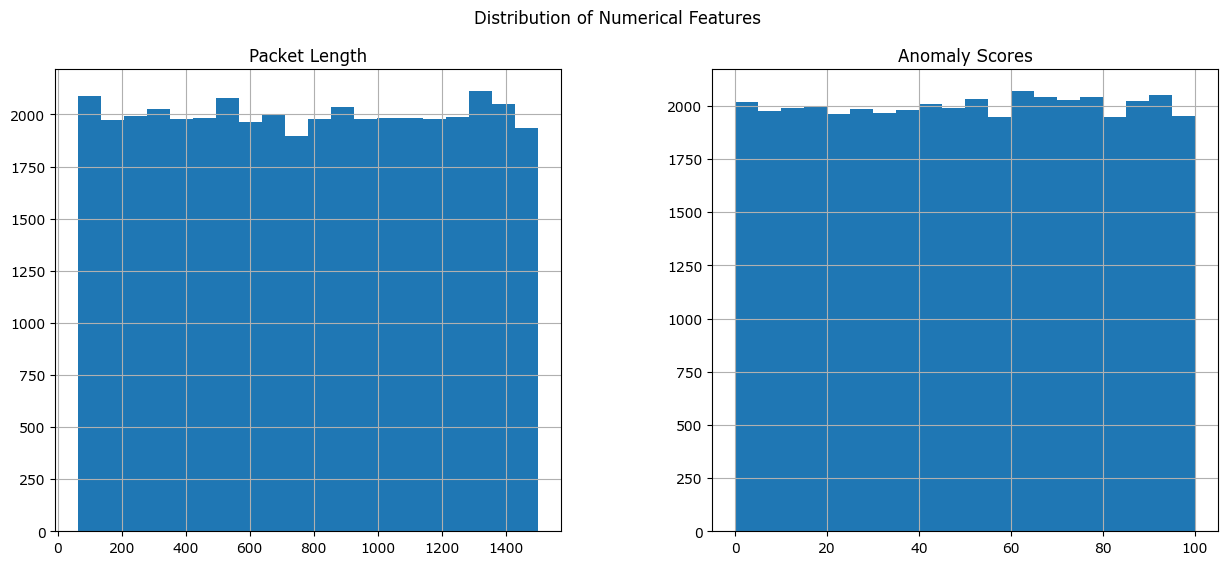

In [16]:

numerical_cols = ['Packet Length', 'Anomaly Scores', 'Severity Level']
df[numerical_cols].hist(bins=20, figsize=(15, 6))
plt.suptitle("Distribution of Numerical Features")
plt.show()


C:\Users\aashi\AppData\Local\Temp\ipykernel_15116\3353833670.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\aashi\AppData\Local\Temp\ipykernel_15116\3353833670.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\aashi\AppData\Local\Temp\ipykernel_15116\3353833670.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\aashi\AppData\Local\Temp\ipykernel_15116\3353833670.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

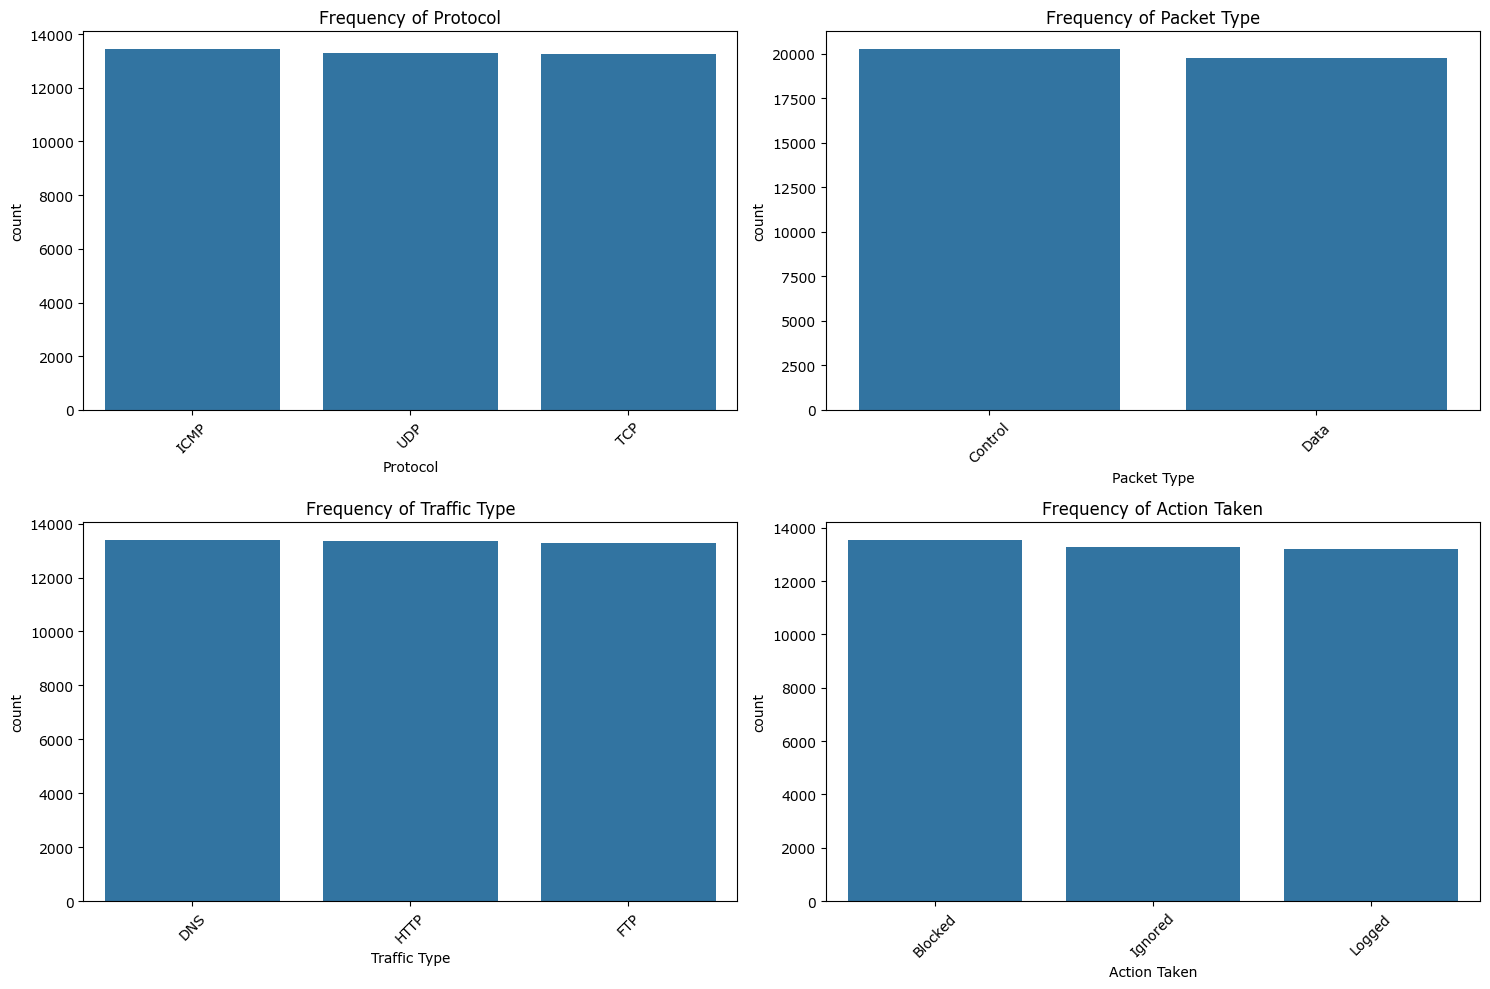

In [ ]:

categorical_cols = ['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, col in zip(axes.ravel(), categorical_cols):
    sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f"Frequency of {col}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

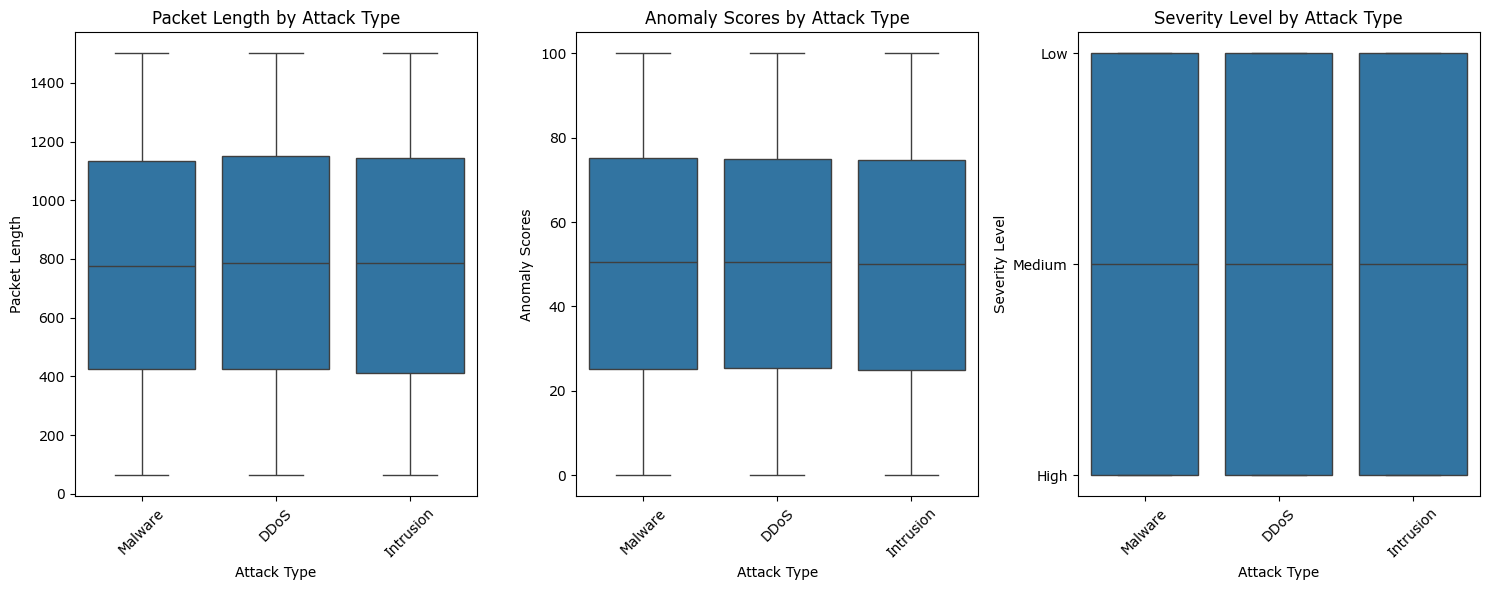

In [18]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Attack Type', y=col)
    plt.title(f"{col} by Attack Type")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


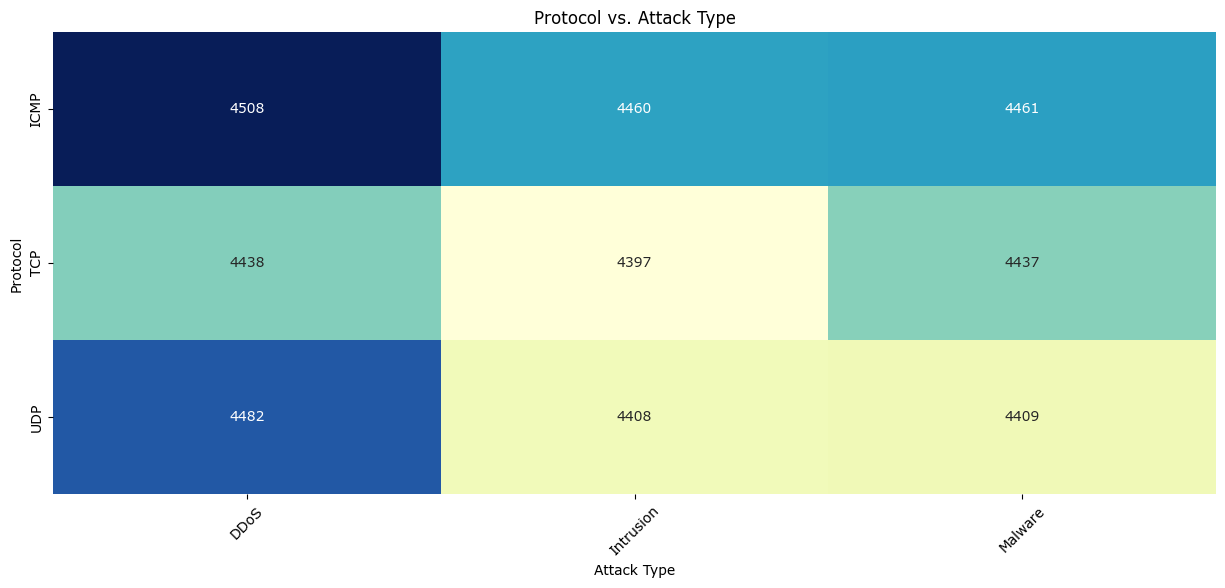

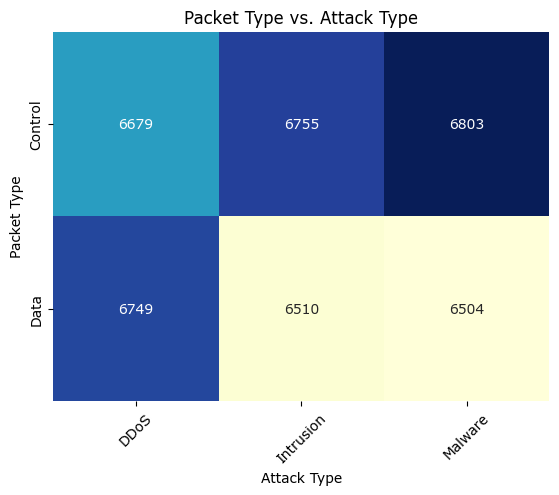

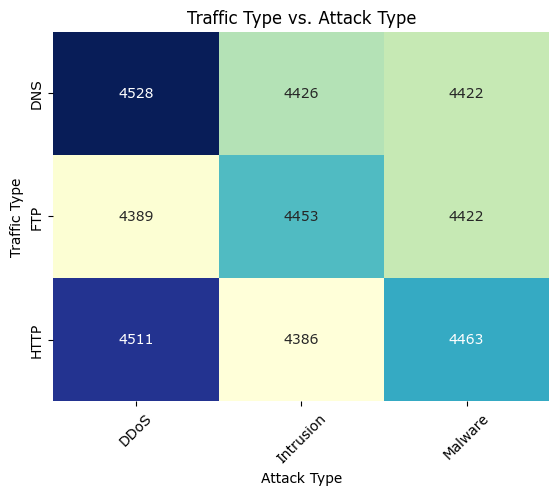

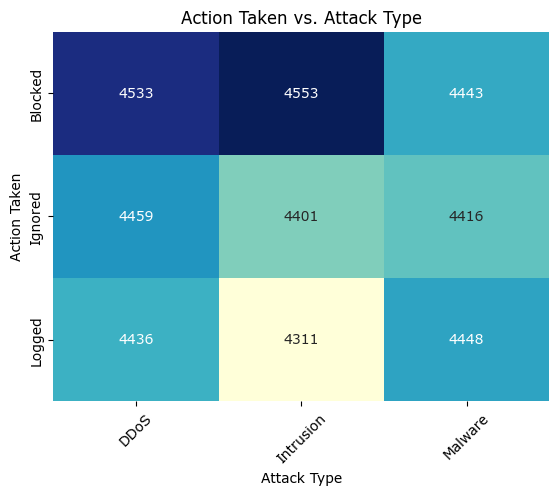

In [19]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols, 1):
    ct = pd.crosstab(df[col], df['Attack Type'])
    sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title(f"{col} vs. Attack Type")
    plt.xlabel("Attack Type")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()


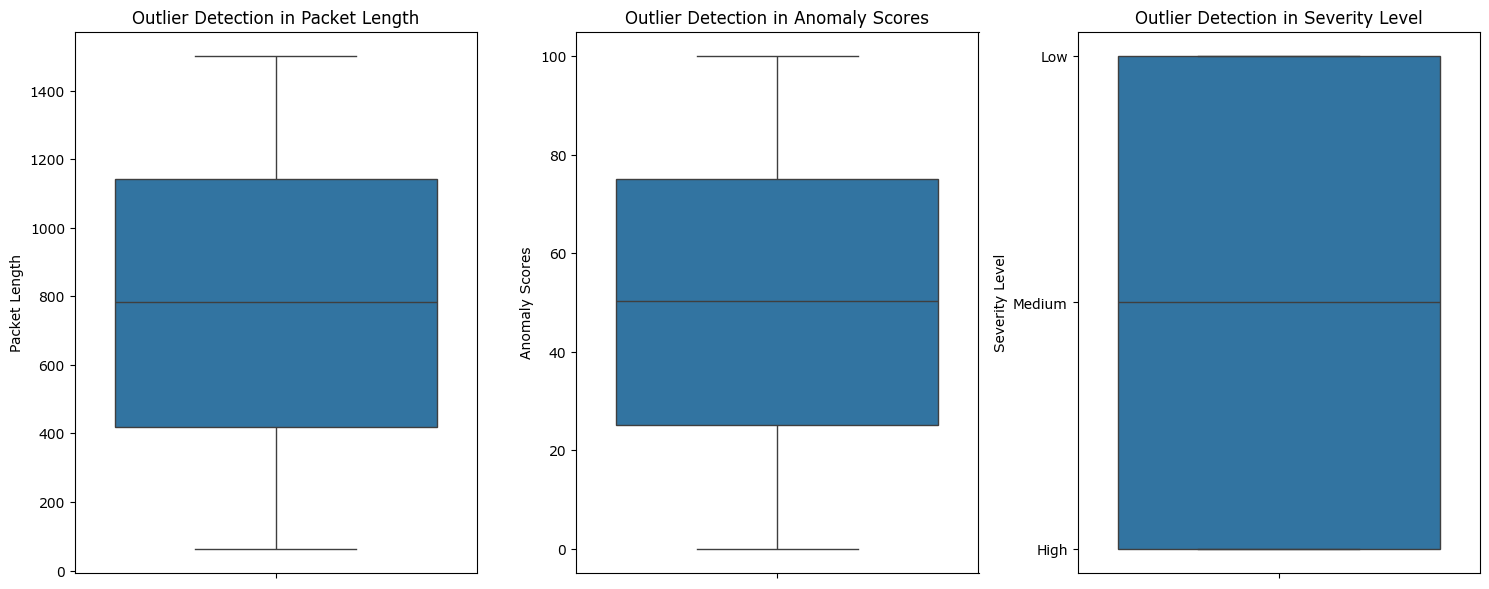

In [21]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Outlier Detection in {col}")
plt.tight_layout()
plt.show()


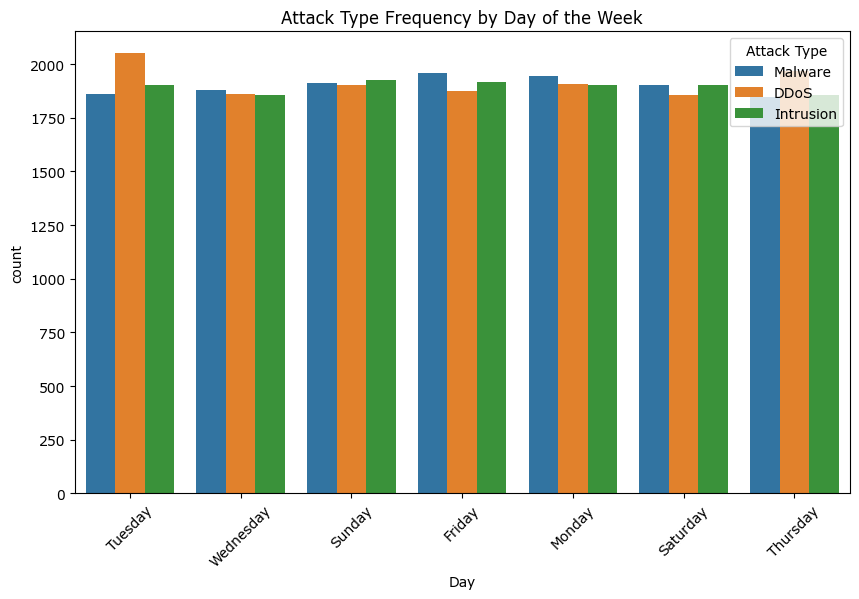

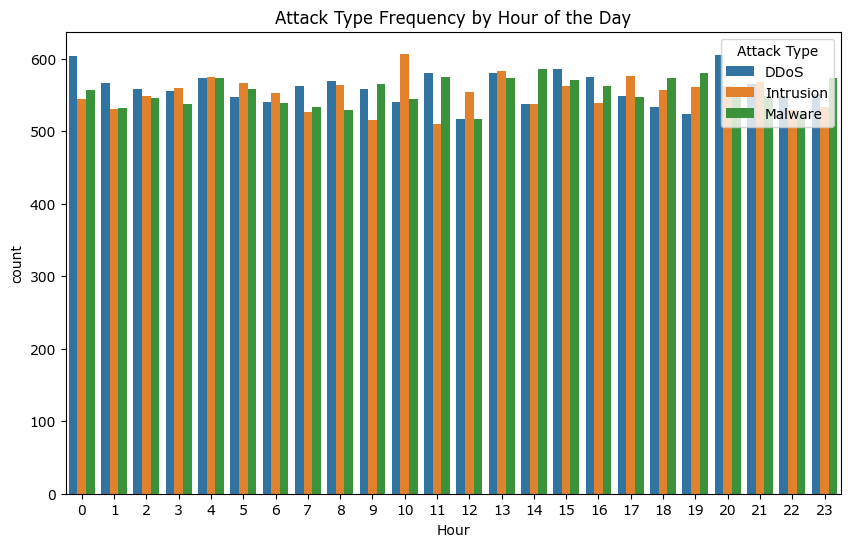

In [22]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day_name()
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day', hue='Attack Type')
plt.title("Attack Type Frequency by Day of the Week")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', hue='Attack Type')
plt.title("Attack Type Frequency by Hour of the Day")
plt.show()
